In [1]:
import numpy as np
import matplotlib.pyplot as plt

def author():
    return 'tpasumarthi3' # replace tb34 with your Georgia Tech username.

def gtid():
    return 903085537 # replace with your GT ID number

def get_spin_result(win_prob):
    result = False
    if np.random.random() <= win_prob:
        result = True
    return result

def test_code():
    win_prob = 0.47 # set appropriately to the probability of a win
    np.random.seed(gtid()) # do this only once
    print(get_spin_result(win_prob)) # test the roulette spin
    
# add your code here to implement the experiments

if __name__ == "__main__":
    test_code()


True


In [2]:
np.random.seed(gtid())

In [3]:
def simulate_round():
    round=1
    winnings=0
    winnings_log=(np.ones(1001)*80)
    winnings_log[0]=0
    win_prob = 0.47
    
    while(winnings<80 and round<=1000):
        won=False
        bet=1
        while (not won and round<=1000):
            won= get_spin_result(win_prob)
            if(won):
                winnings=winnings+bet
            else:
                winnings=winnings-bet
                bet=bet*2
            winnings_log[round]=winnings
            round=round+1
    return winnings_log

In [4]:
print(simulate_round())

[ 0.  1.  0. ... 80. 80. 80.]


In [5]:
def figure1():
    for i in range(10):
        result= simulate_round()
        plt.plot(result)
    axes = plt.gca()
    axes.set_xlim([0,300])
    axes.set_ylim([-256,100])
    plt.title("winnnings vs bets")
    plt.xlabel("bets")
    plt.ylabel("winnings")
    plt.legend(['round 1','round 2','round 3','round 4','round 5','round 6','round 7','round 8','round 9','round 10',])
    plt.savefig('figure1.png')

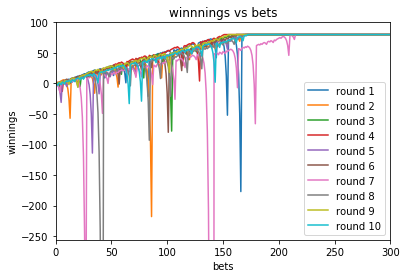

In [6]:
figure1()

In [7]:
def figure2_and_3():
    results=[]
    for i in range(1000):
        results.append(simulate_round())
    results=np.array(results)
    
    mean=np.mean(results, axis=0)
    median=np.median(results, axis=0)
    std=np.std(results, axis=0)
    
    #mean_std=np.std(mean)
    #mean_std=np.ones(len(mean))*mean_std
    
    #median_std=np.std(median)
    #median_std=np.ones(len(median))*median_std
    
    plt.plot(mean)
    plt.plot(mean-std)
    plt.plot(mean+std)
    axes = plt.gca()
    axes.set_xlim([0,300])
    axes.set_ylim([-256,100])
    plt.title("winnnings vs bets")
    plt.xlabel("bets")
    plt.ylabel("winnings")
    plt.legend(['mean','mean-std','mean+std'])
    plt.savefig('figure2.png')
    plt.clf()
    
    plt.plot(median)
    plt.plot(median-std)
    plt.plot(median+std)
    axes = plt.gca()
    axes.set_xlim([0,300])
    axes.set_ylim([-256,100])
    plt.title("winnnings vs bets")
    plt.xlabel("bets")
    plt.ylabel("winnings")
    plt.legend(['median','median-std','median+std'])
    plt.savefig('figure3.png')

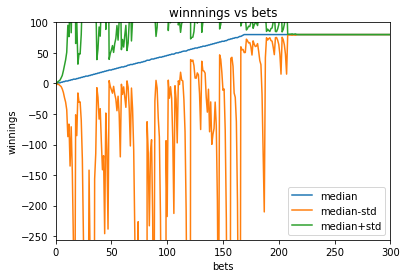

In [8]:
figure2_and_3()

In [9]:
def simulate_realistic():
    round=1
    winnings=0
    winnings_log=(np.ones(1001)*80)
    winnings_log[0]=0
    win_prob = 0.47
    roll=256
    lost=False
    
    while(winnings<80 and round<=1000 and not lost):
        won=False
        bet=1
        while (not won and round<=1000 and not lost):
            won= get_spin_result(win_prob)
            if(won):
                winnings=winnings+bet
            else:
                winnings=winnings-bet
                bet=bet*2
                money=roll+winnings
                if(money==0):
                    lost=True
                    winnings_log[round:]=-256
                    break
                elif(money<bet):
                    bet=money
            winnings_log[round]=winnings
            round=round+1
    return winnings_log

In [10]:
simulate_realistic()

array([ 0.,  1.,  0., ..., 80., 80., 80.])

In [11]:
def figure4_and_5():
    results=[]
    for i in range(1000):
        results.append(simulate_realistic())
    results=np.array(results)
    
    mean=np.mean(results, axis=0)
    median=np.median(results, axis=0)
    std=np.std(results, axis=0)
    
    #mean_std=np.std(mean)
    #mean_std=np.ones(len(mean))*mean_std
    
    #median_std=np.std(median)
    #median_std=np.ones(len(median))*median_std
    
    plt.plot(mean)
    plt.plot(mean-std)
    plt.plot(mean+std)
    axes = plt.gca()
    axes.set_xlim([0,300])
    axes.set_ylim([-256,100])
    plt.title("winnnings vs bets")
    plt.xlabel("bets")
    plt.ylabel("winnings")
    plt.legend(['mean','mean-std','mean+std'])
    plt.savefig('figure4.png')
    plt.clf()
    
    plt.plot(median)
    plt.plot(median-std)
    plt.plot(median+std)
    axes = plt.gca()
    axes.set_xlim([0,300])
    axes.set_ylim([-256,100])
    plt.title("winnnings vs bets")
    plt.xlabel("bets")
    plt.ylabel("winnings")
    plt.legend(['median','median-std','median+std'])
    plt.savefig('figure5.png')

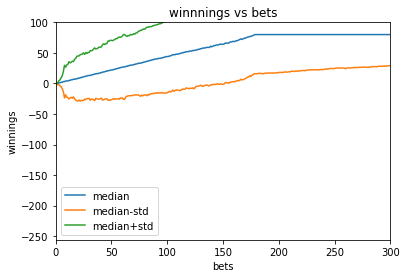

In [12]:
figure4_and_5()